In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

!pip install idx2numpy

from tensorflow.keras import Sequential, utils, optimizers
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
import idx2numpy
import cv2 as cv
import numpy as np
import gzip
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

train_data_path = '/content/gdrive/My Drive/data10/train-images-idx3-ubyte.gz'
test_data_path = '/content/gdrive/My Drive/data10/t10k-images-idx3-ubyte.gz'
train_label_path = '/content/gdrive/My Drive/data10/train-labels-idx1-ubyte.gz'
test_label_path = '/content/gdrive/My Drive/data10/t10k-labels-idx1-ubyte.gz'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:

class Alex():

	def __init__(self):
		self.model = Sequential()
		self.model.add(Conv2D(96,(3,3),strides=(1,1),input_shape= (28,28,1),padding='valid',activation='relu',kernel_initializer='uniform'))
		self.model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
		self.model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
		self.model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
		self.model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
		self.model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
		self.model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
		self.model.add(Flatten())
		self.model.add(Dense(4096,activation='relu'))
		self.model.add(Dropout(0.5))
		self.model.add(Dense(4096,activation='relu'))
		self.model.add(Dropout(0.5))
		self.model.add(Dense(10,activation='softmax'))

	def extract_data(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(16)
			buf = f.read(28 * 28 * num_img)
			train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
			train_data = train_data.reshape(num_img, 28, 28, 1)
			return train_data

	def extract_labels(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(8)
			buf = f.read(num_img)
			labels= np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
			# labels = labels.reshape(num_img, 28, 28, 1)
			return labels


In [0]:
alex = Alex()

train_data = alex.extract_data(train_data_path, 60000)
train_labels = alex.extract_labels(train_label_path, 60000)
test_data = alex.extract_data(test_data_path, 10000)
test_labels = alex.extract_labels(test_label_path, 10000)


Fd =open('/content/gdrive/My Drive/data10/Network_Best_one.h5', 'w+') 
Fd.close()

In [15]:
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5 )
cs= ModelCheckpoint(filepath='/content/gdrive/My Drive/data10/Network_Best_one.h5', monitor='val_loss', save_best_only=True)
alex.model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist = alex.model.fit(train_data, train_labels, batch_size = 100, validation_data=(test_data, test_labels), epochs=300 ,callbacks = [es,cs])
alex.model.save('/content/gdrive/My Drive/data10/Network_config_dec.h5')
with open('/content/gdrive/My Drive/data10/History_config_dec', 'wb') as file:
  pickle.dump(hist.history, file)


Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 43s 713us/sample - loss: 3.0314 - acc: 0.6784 - val_loss: 0.5437 - val_acc: 0.7847
Epoch 2/300
60000/60000 [==============================] - 42s 700us/sample - loss: 0.4898 - acc: 0.8145 - val_loss: 0.4923 - val_acc: 0.8045
Epoch 3/300
60000/60000 [==============================] - 42s 699us/sample - loss: 0.4301 - acc: 0.8343 - val_loss: 0.4619 - val_acc: 0.8239
Epoch 4/300
60000/60000 [==============================] - 42s 706us/sample - loss: 0.3831 - acc: 0.8555 - val_loss: 0.4025 - val_acc: 0.8488
Epoch 5/300
60000/60000 [==============================] - 42s 701us/sample - loss: 0.3423 - acc: 0.8731 - val_loss: 0.3650 - val_acc: 0.8658
Epoch 6/300
60000/60000 [==============================] - 42s 705us/sample - loss: 0.3123 - acc: 0.8821 - val_loss: 0.3505 - val_acc: 0.8704
Epoch 7/300
60000/60000 [==============================] - 42s 707us/sample - loss: 0.2948 - acc: 

OUTPUT FROM BEST MODEL
10000/10000 - 3s - loss: 0.2896 - acc: 0.8952


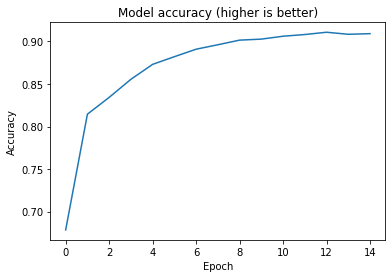

In [16]:


print("OUTPUT FROM BEST MODEL")
#Bestmodel = MiniBatch_GD()
alex.model.load_weights('/content/gdrive/My Drive/data10/Network_Best_one.h5')
oss, acc = alex.model.evaluate(test_data,  test_labels, verbose=2)




import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()